/media/NAS/

dentro 
- Truefake/ nuovi dati generati
- FORLAB/ immagini real
- TrueFace sia dati fake che real solo di facce.

In [ ]:
path_TrueFace_PreSocial_Real = "/media/NAS/TrueFace/TrueFace/TrueFace_PreSocial/Real/FFHQ"
path_TrueFace_PreSocial_Fake_StyleGAN_1 = "/media/NAS/TrueFace/TrueFace/TrueFace_PreSocial/Fake/StyleGAN/images-psi-0.5"
path_TrueFace_PreSocial_Fake_StyleGAN_2 = "/media/NAS/TrueFace/TrueFace/TrueFace_PreSocial/Fake/StyleGAN/images-psi-0.7"

Displaying image: 00000.png


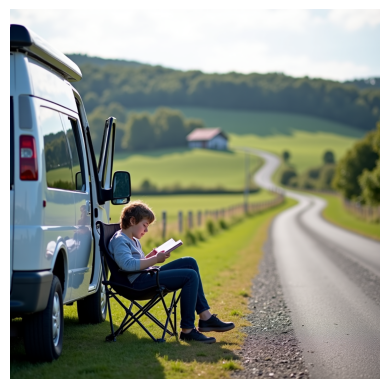

Image dimensions: 1024x1024 (width x height)


In [ ]:
path = "/media/NAS/TrueFace/TrueFace/TrueFace_PreSocial/Real/FFHQ"
path = "/media/NAS/TrueFake/Extension/FLUX.1/general"

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os #

cnt = 0
for file_name in os.listdir(path):
    file_path = os.path.join(path, file_name)
    
    if os.path.isfile(file_path) and file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        print(f"Displaying image: {file_name}")
        
        image = mpimg.imread(file_path)
        plt.imshow(image)
        plt.axis('off')  
        plt.show()
                
        height, width = image.shape[:2]
        print(f"Image dimensions: {width}x{height} (width x height)")
        break

# Dataloader

In [ ]:
# import torch
# from torchvision import transforms
# from torch.utils.data import DataLoader, Subset, Dataset, ConcatDataset
# import numpy as np
# import os
# from PIL import Image  # Import PIL's Image module

# # Define label mapping globally
# LABEL_MAP = {
#     'Real': 1,
#     'Fake': 0
# }

# class DatasetTrueFace(Dataset):
#     def __init__(self, img_dir, label, transform=None):
#         """
#         A dataset for loading images from a flat directory (no subdirectories, all images in one folder).
        
#         Args:
#         - img_dir (str): Path to the directory containing images.
#         - label (int): Numerical label for all images in this dataset.
#         - transform (callable, optional): Optional transform to be applied on a sample.
#         """
#         self.img_dir = img_dir
#         self.transform = transform
#         self.label = label  # Store the label for all images
#         self.image_files = [
#             f for f in os.listdir(img_dir)
#             if os.path.isfile(os.path.join(img_dir, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))
#         ]

#     def __len__(self):
#         return len(self.image_files)

#     def __getitem__(self, idx):
#         img_path = os.path.join(self.img_dir, self.image_files[idx])
#         try:
#             image = Image.open(img_path).convert('RGB')  # Load image as PIL Image
#         except Exception as e:
#             print(f"Error loading image {img_path}: {e}")
#             # Handle the error as needed; for now, return a zero tensor
#             image = Image.new('RGB', (224, 224))
        
#         if self.transform:
#             image = self.transform(image)
        
#         return image, self.label  # Return image and label

# class DataloaderTrueFace:
#     def __init__(self):
#         self.base_path = '/media/NAS/TrueFace/TrueFace'

#     def load_data(self, main_category, platform, styleGAN_type, psi_value,
#                   batch_size=32, transform=None, max_images_per_class=None):
#         """
#         Load data for both 'Real' and 'Fake' classes and concatenate them.

#         Args:
#         - main_category (str): Main category of the dataset.
#         - platform (str): Platform name (e.g., 'Facebook').
#         - styleGAN_type (str): Type of StyleGAN used.
#         - psi_value (str): Psi value for StyleGAN.
#         - batch_size (int, optional): Batch size for DataLoader.
#         - transform (callable, optional): Transformations to apply.
#         - max_images_per_class (int, optional): Maximum number of images to load per class.
        
#         Returns:
#         - DataLoader: PyTorch DataLoader for the combined dataset.
#         """
#         if transform is None:
#             transform = transforms.Compose([
#                 transforms.Resize((224, 224)),  # Ensure all images are the same size
#                 transforms.ToTensor(),
#                 transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                                      std=[0.229, 0.224, 0.225])
#             ])

#         datasets_list = []
#         for real_or_fake in ['Real', 'Fake']:
#             # Map 'Real' and 'Fake' to numerical labels
#             label = LABEL_MAP[real_or_fake]

#             # Construct the path based on parameters
#             if main_category == 'TrueFace_PreSocial':
#                 if real_or_fake == 'Real':
#                     path = f'{self.base_path}/{main_category}/{real_or_fake}/FFHQ'
#                 else:
#                     path = f'{self.base_path}/{main_category}/{real_or_fake}/{styleGAN_type}/{psi_value}'
#             elif main_category == 'TrueFace_PostSocial':
#                 if real_or_fake == 'Real':
#                     path = f'{self.base_path}/{main_category}/{platform}/{real_or_fake}/FFHQ'
#                 else:
#                     path = f'{self.base_path}/{main_category}/{platform}/{real_or_fake}/{styleGAN_type}/{psi_value}'
#             else:
#                 raise ValueError("Invalid main category or other parameter.")

#             print(f"Attempting to load data from: {path}")
#             if not os.path.exists(path):
#                 print(f"Directory does not exist: {path}. Skipping.")
#                 continue  # Skip if directory doesn't exist

#             dataset = DatasetTrueFace(path, label=label, transform=transform)
#             print(f"Number of images found for '{real_or_fake}': {len(dataset)}")

#             if len(dataset) == 0:
#                 print(f"No images found in directory: {path}. Skipping.")
#                 continue  # Skip if dataset is empty

#             if max_images_per_class is not None:
#                 indices = list(range(min(max_images_per_class, len(dataset))))
#                 dataset = Subset(dataset, indices)
#                 print(f"Length of dataset after Subset for '{real_or_fake}': {len(dataset)}")

#             datasets_list.append(dataset)

#         if not datasets_list:
#             raise ValueError("No datasets were loaded. Please check the paths and parameters.")

#         # Concatenate all datasets
#         combined_dataset = ConcatDataset(datasets_list)
#         print(f"Total number of images in combined dataset: {len(combined_dataset)}")

#         dataloader = DataLoader(combined_dataset, batch_size=batch_size, shuffle=True)
#         return dataloader

# if __name__ == "__main__":
#     loader = DataloaderTrueFace()
#     dataloader = loader.load_data(
#         'TrueFace_PostSocial', 'Facebook', 'StyleGAN',
#         psi_value="images-psi-0.5", batch_size=64, max_images_per_class=100  # IMAGE LIMIT
#     )


Attempting to load data from: /media/NAS/TrueFace/TrueFace/TrueFace_PostSocial/Facebook/Real/FFHQ
Number of images found for 'Real': 10000
Length of dataset after Subset for 'Real': 100
Attempting to load data from: /media/NAS/TrueFace/TrueFace/TrueFace_PostSocial/Facebook/Fake/StyleGAN/images-psi-0.5
Number of images found for 'Fake': 2500
Length of dataset after Subset for 'Fake': 100
Total number of images in combined dataset: 200


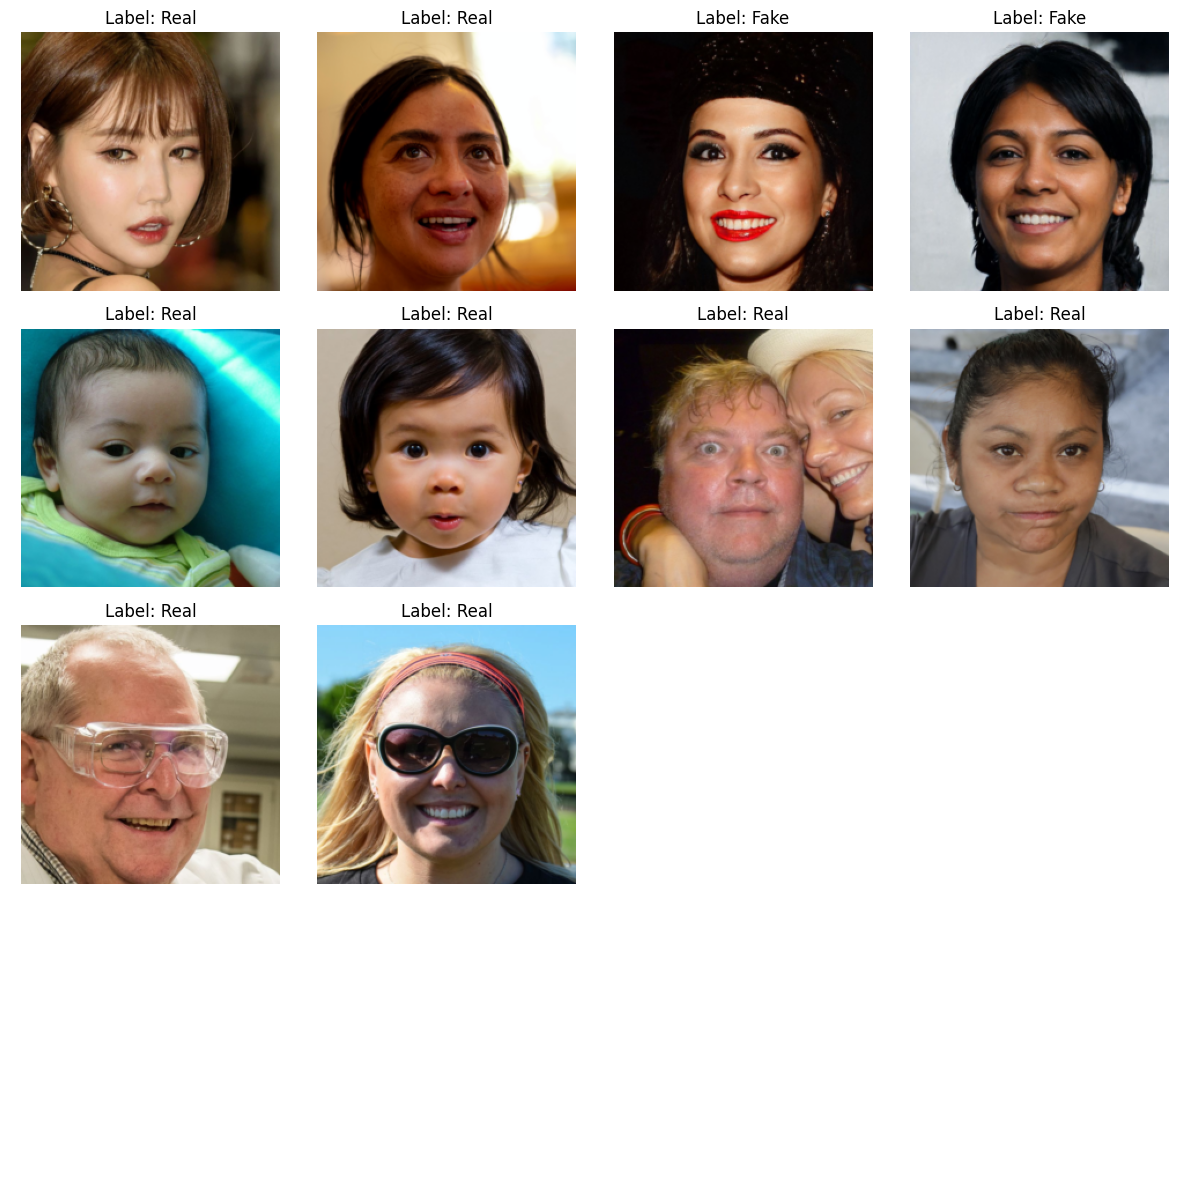

In [ ]:
# def plot_images(images, labels, classes=['Fake', 'Real'], num_images=20):
#     """
#     Plots a grid of images with their corresponding labels.

#     Args:
#         images (torch.Tensor): Batch of images, shape (B, C, H, W).
#         labels (torch.Tensor or list): Corresponding labels for the images, shape (B).
#         classes (list): List of class names corresponding to label indices.
#         num_images (int): Number of images to display. Defaults to 8.

#     Raises:
#         ValueError: If num_images is greater than the number of images in the batch.
#     """
#     # Ensure num_images does not exceed the batch size
#     if num_images > len(images):
#         raise ValueError(f"num_images={num_images} exceeds batch size={len(images)}.")

#     # Select the first num_images from the batch
#     images = images[:num_images]
#     labels = labels[:num_images]

#     # Create a grid for plotting
#     grid_size = int(np.ceil(np.sqrt(num_images)))
#     fig, axes = plt.subplots(grid_size, grid_size, figsize=(12, 12))
#     axes = axes.flatten()

#     for idx in range(num_images):
#         image = images[idx]
#         label = labels[idx]

#         # If the image was normalized, unnormalize it
#         # Assuming normalization was done using mean=[0.485, 0.456, 0.406]
#         # and std=[0.229, 0.224, 0.225]
#         mean = np.array([0.485, 0.456, 0.406])
#         std = np.array([0.229, 0.224, 0.225])
#         image = image.numpy().transpose((1, 2, 0))  # Convert to HWC format
#         image = std * image + mean  # Unnormalize
#         image = np.clip(image, 0, 1)  # Clip to valid range

#         ax = axes[idx]
#         ax.imshow(image)
#         ax.set_title(f"Label: {classes[label]}")
#         ax.axis('off')

#     # Hide any remaining subplots if num_images is not a perfect square
#     for idx in range(num_images, len(axes)):
#         axes[idx].axis('off')

#     plt.tight_layout()
#     plt.show()
    
# images, labels = next(iter(dataloader))

# # Plot the images with labels
# plot_images(images, labels, classes=['Fake', 'Real'], num_images=10)